In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")   

---


In [4]:
# Берем rfm датасет
rfm_df = pd.read_csv("./labels/rfm.csv")
rfm_df.head()

,customer_unique_id,R_rank,F_rank,M_rank,RFM_Weighted,Churn_Risk
0,0000366f3b9a7992bf8c76cfdf3221e2,4,1,1,2.5,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3,1,1,2.0,2
2,0000f46a3911fa3c0805444483337064,1,1,1,1.0,3
3,0000f6ccb0745a6a4b88665a16c9f078,2,1,1,1.5,3
4,0004aac84e0df4da2b147fca70cf8255,2,1,1,1.5,3


In [7]:
# kmeans датасет
kmeans_df = pd.read_csv("./labels/kmeans.csv")
kmeans_df.head()

,customer_unique_id,num_orders,price_mean,review_score_mean,life_span,most_frequent_product_category,customer_city,labels
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,5.0,0,7,647,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,4.0,0,43,2564,0
2,0000f46a3911fa3c0805444483337064,1,69.00,3.0,0,66,3477,0
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,4.0,0,68,443,0
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,5.0,0,68,3713,0


In [14]:
# Консолидируем
df = kmeans_df.merge(rfm_df, on="customer_unique_id")
df.head()

,customer_unique_id,num_orders,price_mean,review_score_mean,life_span,most_frequent_product_category,customer_city,labels,R_rank,F_rank,M_rank,RFM_Weighted,Churn_Risk
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,5.0,0,7,647,0,4,1,1,2.5,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,4.0,0,43,2564,0,3,1,1,2.0,2
2,0000f46a3911fa3c0805444483337064,1,69.00,3.0,0,66,3477,0,1,1,1,1.0,3
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,4.0,0,68,443,0,2,1,1,1.5,3
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,5.0,0,68,3713,0,2,1,1,1.5,3


In [15]:
# Выделяем рабочий сабсет
X = df.iloc[:, 1:]
X.head()

,num_orders,price_mean,review_score_mean,life_span,most_frequent_product_category,customer_city,labels,R_rank,F_rank,M_rank,RFM_Weighted,Churn_Risk
0,1,129.90,5.0,0,7,647,0,4,1,1,2.5,2
1,1,18.90,4.0,0,43,2564,0,3,1,1,2.0,2
2,1,69.00,3.0,0,66,3477,0,1,1,1,1.0,3
3,1,25.99,4.0,0,68,443,0,2,1,1,1.5,3
4,1,180.00,5.0,0,68,3713,0,2,1,1,1.5,3


In [20]:
# Стандартизируем 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,num_orders,price_mean,review_score_mean,life_span,most_frequent_product_category,customer_city,labels,R_rank,F_rank,M_rank,RFM_Weighted,Churn_Risk
0,-0.282648,0.022553,0.660935,-0.12658,-1.409941,-1.421278,-0.123406,1.331211,-0.180744,-0.423848,0.968726,-0.536399
1,-0.282648,-0.566116,-0.120897,-0.12658,0.172831,0.180605,-0.123406,0.437786,-0.180744,-0.423848,0.193943,-0.536399
2,-0.282648,-0.300419,-0.902728,-0.12658,1.184046,0.943526,-0.123406,-1.349065,-0.180744,-0.423848,-1.355623,1.062652
3,-0.282648,-0.528515,-0.120897,-0.12658,1.271978,-1.591744,-0.123406,-0.455640,-0.180744,-0.423848,-0.580840,1.062652
4,-0.282648,0.288250,0.660935,-0.12658,1.271978,1.140732,-0.123406,-0.455640,-0.180744,-0.423848,-0.580840,1.062652


<Axes: >

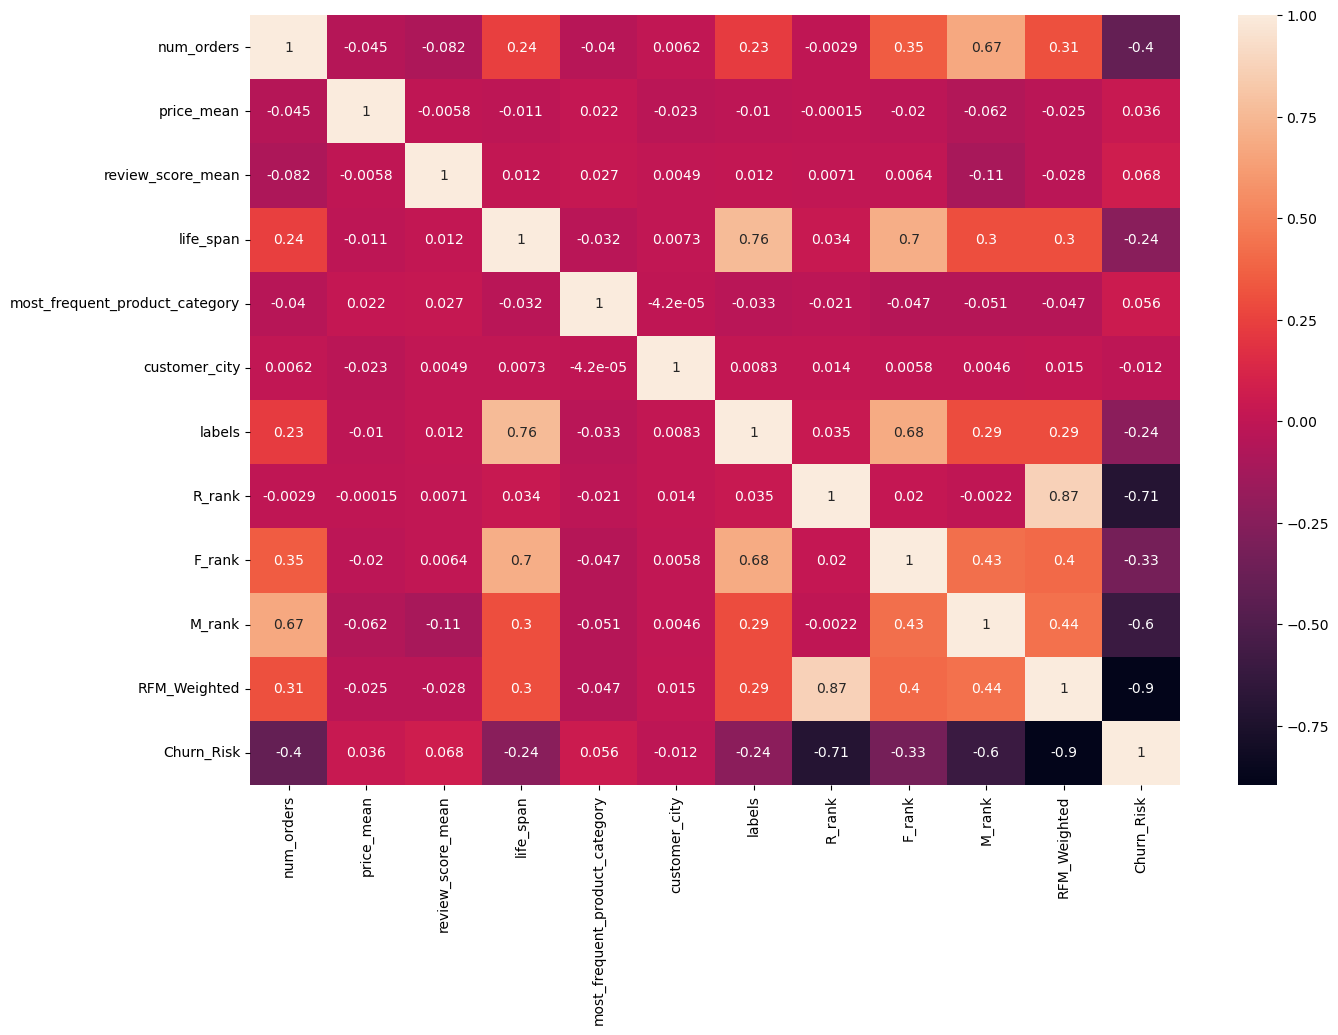

In [24]:
# Посмотрим на мультиколлениарность
fig, axes = plt.subplots(1,1, figsize=(15, 10))
sns.heatmap(X_scaled.corr(), annot=True, ax=axes)

> Скинем RFM-weighted для ужаление мультикора


In [ ]:
X_scaled.drop(columns=["RFM_Weighted", ""], inplace=True)

In [55]:
X_test = X[["Churn_Risk", "labels"]]

---
Проведем исследование кластеризации

In [30]:
# Метод локтя
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 8)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_test)
    
    inertia.append(kmeans.inertia_)
    
    # Предсказание кластеров и расчет коэффициента силуэта
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_test, cluster_labels)
    silhouette_scores.append(silhouette_avg)



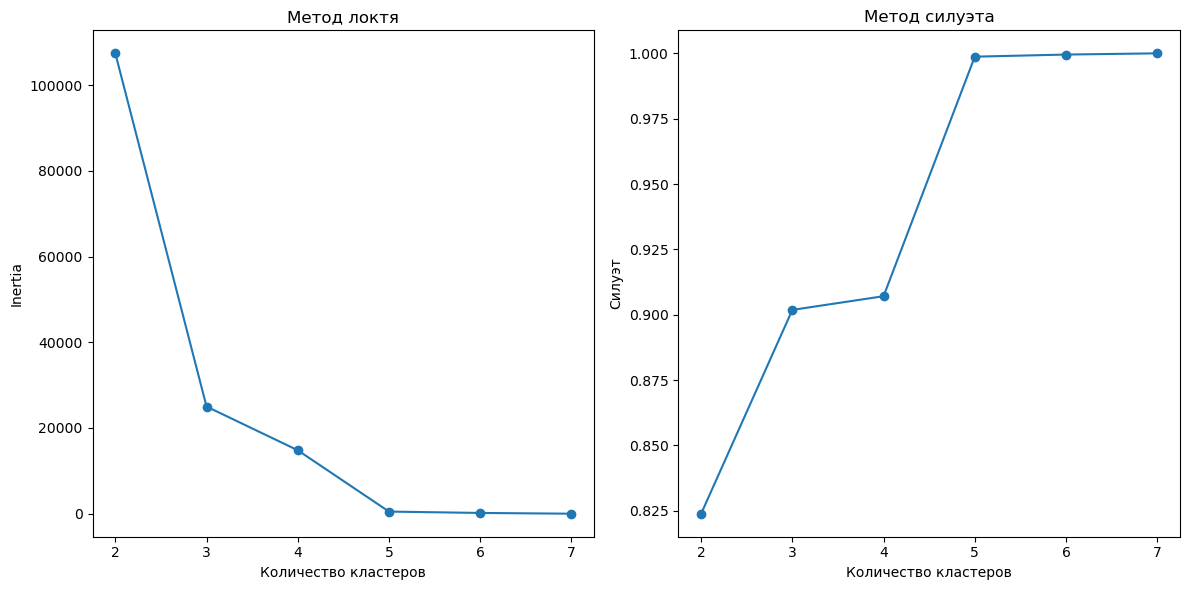

In [31]:
# Визуализация метода локтя
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)

# Визуализация метода силуэта
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Метод силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэт')
plt.xticks(range_n_clusters)

plt.tight_layout()
plt.show()

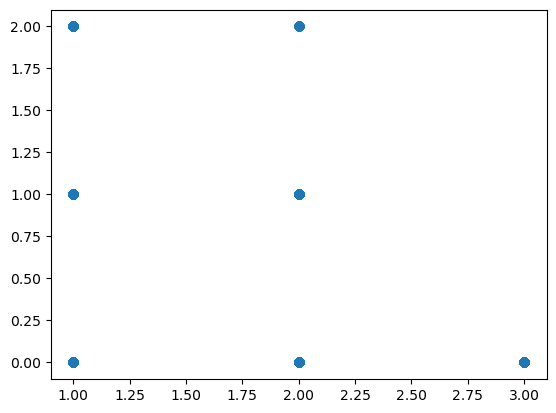

In [56]:
X_test
plt.scatter(data=X_test, x="Churn_Risk", y="labels")

> Можно наблюдать кластеризацию (агломеративно) на 7 кластеров, но выдвигая предположения (основанное на эвристиках) об минимальном количестве лояльных клиентов в совокупности относительно остальных групп можно предположить кластеризацию путем проведения отсечных вертикальных черт делящих выборку на 3 кластера.

----
### На основе полученных гиперпараметров кластеризуем и получим метки классов

In [57]:
k_means_whole = KMeans(n_clusters=3, random_state=42)
k_means_whole.fit(X_test)

X_test["labels_combo"] = k_means_whole.labels_
X_test

,Churn_Risk,labels,labels_combo
0,2,0,2
1,2,0,2
2,3,0,0
3,3,0,0
4,3,0,0
...,...,...,...
91571,2,0,2
91572,3,0,0
91573,3,0,0
91574,2,0,2


In [58]:
X_test["labels_combo"].value_counts()

labels_combo
2    45457
0    38419
1     7700
Name: count, dtype: int64

In [60]:
X_test["Churn_Risk_maped"] = X_test["Churn_Risk"].map(
    {3: "Высокий риск", 2: "Средний риск", 1:"Низкий риск"})

X_test

,Churn_Risk,labels,labels_combo,Churn_Risk_maped
0,2,0,2,Средний риск
1,2,0,2,Средний риск
2,3,0,0,Высокий риск
3,3,0,0,Высокий риск
4,3,0,0,Высокий риск
...,...,...,...,...
91571,2,0,2,Средний риск
91572,3,0,0,Высокий риск
91573,3,0,0,Высокий риск
91574,2,0,2,Средний риск


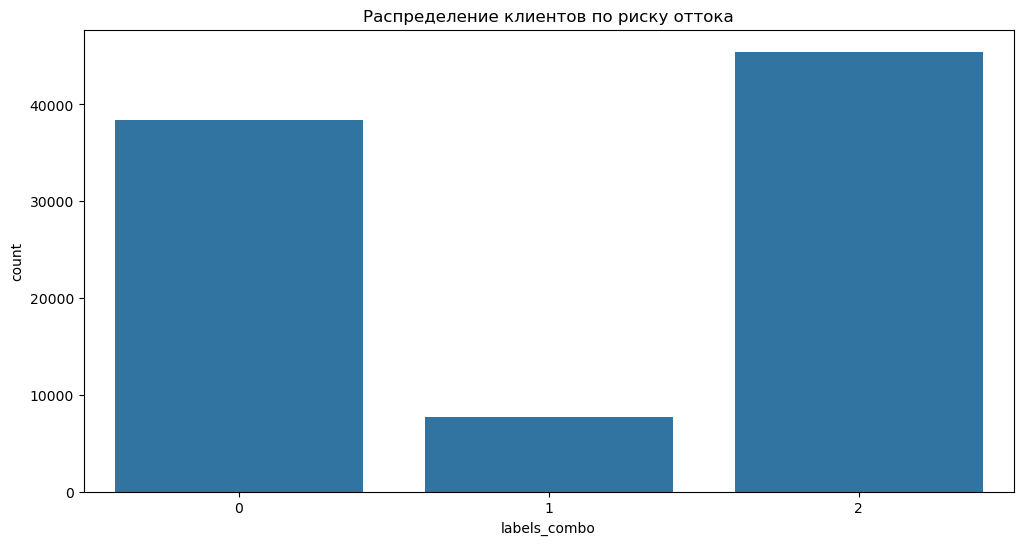

In [61]:
plt.figure(figsize=(12, 6))
sns.countplot(x='labels_combo', data=X_test)
plt.title('Распределение клиентов по риску оттока')
plt.savefig("./labels/combo_chart.png", dpi=300, bbox_inches='tight')
plt.show()

In [68]:
X_test[["labels_combo"]]

,labels_combo
0,2
1,2
2,0
3,0
4,0
...,...
91571,2
91572,0
91573,0
91574,2


> Комбинированная кластеризация, дает нам возможность выдвинуть предположение о следующем распределении клиентов 

0 - высокий риск оттока 1 покупка, вероятнее всего разовый клиент
1 - лояльные клиенты, фокусировка на удержании
2 - потенциально лояльные клиенты, фокусировка на форсированнии интереса

In [ ]:
df["labels_final"] = X_test[["labels_combo"]]
df

In [73]:
X_final = df[["customer_unique_id", "labels_final"]]
X_final

,customer_unique_id,labels_final
0,0000366f3b9a7992bf8c76cfdf3221e2,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2
2,0000f46a3911fa3c0805444483337064,0
3,0000f6ccb0745a6a4b88665a16c9f078,0
4,0004aac84e0df4da2b147fca70cf8255,0
...,...,...
91571,fffcf5a5ff07b0908bd4e2dbc735a684,2
91572,fffea47cd6d3cc0a88bd621562a9d061,0
91573,ffff371b4d645b6ecea244b27531430a,0
91574,ffff5962728ec6157033ef9805bacc48,2


In [76]:
X_final["labels_decode"] = X_final["labels_final"].map(
    {0: "Разовый клиент", 1:"Лояльный клиент", 2:"Потенциально лояльные"})

In [78]:
X_final

,customer_unique_id,labels_final,labels_decode
0,0000366f3b9a7992bf8c76cfdf3221e2,2,Потенциально лояльные
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2,Потенциально лояльные
2,0000f46a3911fa3c0805444483337064,0,Разовый клиент
3,0000f6ccb0745a6a4b88665a16c9f078,0,Разовый клиент
4,0004aac84e0df4da2b147fca70cf8255,0,Разовый клиент
...,...,...,...
91571,fffcf5a5ff07b0908bd4e2dbc735a684,2,Потенциально лояльные
91572,fffea47cd6d3cc0a88bd621562a9d061,0,Разовый клиент
91573,ffff371b4d645b6ecea244b27531430a,0,Разовый клиент
91574,ffff5962728ec6157033ef9805bacc48,2,Потенциально лояльные


In [81]:
X_final.to_csv("./labels/combo_clust.csv", index=False)